# Summer 2025 Python Homework 3

**Release date:** Tuesday, July 8th <br>
**Due date:** Wednesday, __July 16th__, 11:59 p.m. via Gradescope

**Instruction:** Please upload your ipynb file on Gradescope with filename "PythonHW3_YOURPERMNUMBER".

__Background:__ The purpose of this python homework is to explore some path properties of the *simple symmetric* random walk.

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, and a positive integer $N$, we define the following related random variables:

* The total number of periods from $0$ to $2N$ the random walk spends below zero: 

$$C_{2N}:= \vert \{ n \in \{ 1,\dots , 2N \} : S_n < 0 \}\vert. $$

* The time when the random walk **reaches its minimum** value between time $0$ and $2N$: 

$$M_{2N} = \operatorname{argmin} \{ S_n : 0 \leq n \leq 2N \}.$$

Note that both $C_{2N}$ and $M_{2N}$ are discrete random variables taking values between $0$ and $2N$.

Our goal is to explore the **distribution** of $C_{2N}$ and $M_{2N}$.

As usual, we load base packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine



1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with *N* time steps (i.e. from 0,1,2,...,N) starting at $S_0=0$.

Input: 
* <tt>lengthOfRandomWalk = N</tt> 

Output:
* <tt>samplePath</tt>: Array of length N+1 with the entire path of the random walk on 0,1,2,...,N

Test your function by plotting 7 trajectories of SRW with $N=50$.


In [2]:
np.random.seed(160)
def randomWalk(lengthOfRandomWalk):
    # Generate each step X_i
    X_i = [0] + [np.random.choice([-1, 1]) for i in range(lengthOfRandomWalk)]
    
    # Convert list to np array
    X_i = np.array(X_i)
    
    # Sum elements of array x_i to get S_i iteratively
    samplePath = np.cumsum(X_i)
    return samplePath

In [3]:
np.random.seed(160)
#returns an array of length 51, including the initial condition
randomWalk(50)

array([ 0, -1, -2, -1, -2, -1,  0, -1, -2, -1, -2, -3, -2, -3, -4, -5, -4,
       -3, -2, -1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  3,  4,  3,
        4,  3,  2,  3,  4,  3,  4,  5,  6,  7,  8,  7,  8,  7,  8,  7,  8])

2. Plot the trajectory of the random walk you simulated in 1.)

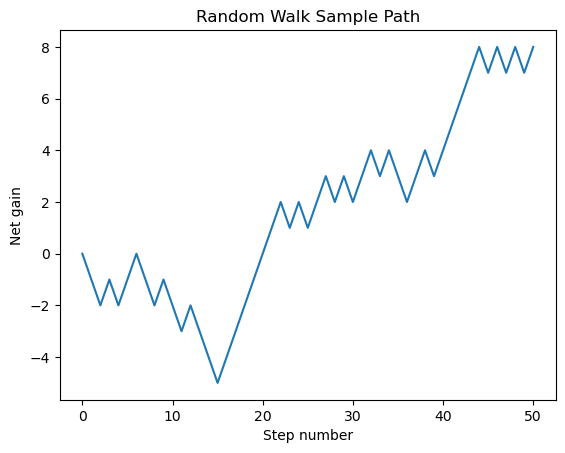

In [4]:
np.random.seed(160)

# Plot randomWalk array with matplotlib
plt.plot(randomWalk(50))
plt.title("Random Walk Sample Path")
plt.xlabel("Step number")
plt.ylabel("Net gain")
plt.show()

## Part a (4 points)

Write a function which takes a path (= realization) of the random walk as an input and then evaluates the value of $C_{2N}$ defined above on that path.

__1. Function:__ <tt>timeBelowZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt>  (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $C_{2N}$ (scalar)

In [31]:
### Insert your code here for total time spend above zero

def timeBelowZero(path):
    # New array that checks elementwise for if that iteration is negative; values that are negative changed to True, positive to False
    negative_check = path[1:] < 0

    # Sum up True values to give the amount of iterations that were negative
    result = np.sum(negative_check)
    return result

In [33]:
## TEST YOUR FUNCTION HERE
np.random.seed(10)
path = randomWalk(50)

print(f'Sample Path: {path}')
print(f'Amount of times the sample path was negative: {timeBelowZero(path)}')

Sample Path: [ 0  1  2  1  2  1  2  3  2  3  4  3  4  5  4  3  4  3  2  1  0 -1  0 -1
 -2 -1  0 -1 -2 -1 -2 -3 -2 -3 -4 -5 -4 -3 -4 -3 -2 -1  0  1  0  1  0 -1
 -2 -3 -2]
Amount of times the sample path was negative: 23


__2.__ Write a function <tt>sampleBelowZero</tt> that samples $M$ paths of the random walk of length 2N, runs <tt>timeBelowZero</tt> on each of them and returns an Array of length M of the resulting empirical distribution of $C_{2N}$.

In [61]:
def sampleBelowZero(N,M):

    # Create an empty numpy array to store M timeBelowZero values
    empirical_distribution = np.empty(M, dtype = int)

    # Store timeBelowZero values m times, each length 2N
    for m in range(M):
        empirical_distribution[m] = timeBelowZero(randomWalk(2*N))

    return empirical_distribution

Run your <tt>sampleBelowZero</tt> function with N=40 and $M=10,000$ paths to compute the probability that the walk spends more than **30 out of 40** steps below zero.

In [115]:
N = 40   # set value for N
M = 10000 # set value for M

samples = sampleBelowZero(N,M) 

In [119]:
# Get the probability by checking which elements have more than 75% of steps that are negative
# then getting the mean (sums up all True elements and divides by size of samples)
probability = np.mean(samples > 60) # Since N = 40, we have n = 80 steps, which means 75% of steps would be 60 steps
probability

0.303

Counterintuitively, almost half the time the walk will spend more than $75\%$ of its steps below zero. 

## Part b (4 points)

We repeat the above steps but now for the random variable $M_{2N}$, the time when the minimum is reached. Write a function that takes a random walk path of length $2N$ and evaluates the value of $M_{2N}$ on it.

__1. Function:__ <tt>timeHitMin(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> (Array of length $2N+1$)

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$ (scalar)

In [152]:
def timeHitMin(randomWalk):

    # argmin gives the index of which value in the array is the minimum
    return np.argmin(randomWalk)

In [156]:
## TEST YOUR FUNCTION HERE
sample = randomWalk(10)
print(f'Random Walk: {sample}, Minimum hit time (n): {timeHitMin(sample)}')

Random Walk: [ 0 -1  0 -1  0 -1  0 -1  0 -1 -2], Minimum hit time (n): 10


__2.__ Write a function <tt>sampleMinTime</tt> that samples $M$ paths of the random walk, runs timeHitMin on each of them and returns an Array of length M that contains the resulting empirical distribution of $M_{2N}$. Use this function to estimate the probability that the Minimum is hit at or  after step 30 out of 40 total steps. 


In [158]:
def sampleMinTime(N, M):
    # Create an empty numpy array to store M timeHitMin values
    empirical_distribution = np.empty(M, dtype = int)

    # Store timeHitMin values m times, each length 2N
    for m in range(M):
        empirical_distribution[m] = timeHitMin(randomWalk(2*N))

    return empirical_distribution

In [163]:
M = 10000
N = 40

samples_min = sampleMinTime(N, M)

In [164]:
# Calculate probability that the minimum is hit after 75% of steps (since N = 40, n = 80 so want after n = 60)
probability_min = np.mean(samples_min > 60)
probability_min

0.288

## Part c (8 points)

It turns out that in fact one can in fact **analytically** find the limiting distribution of $C_{2N}, M_{2N}$ in the limit $N \to \infty$. This is given  by the arcsine distribution.

A random variable $X$ on $[0,1]$ is arcsine-distributed if the cumulative distribution function is given by
$$ \mathbb{P}[X \leq x] = \frac{2}{\pi} \arcsin(\sqrt{x}) $$
for all $0 \leq x \leq 1$ and the probability density function is given by 
$$ f_X(x) = \frac{1}{\pi \sqrt{x(1-x)}}$$
on $(0,1)$. 

Random Walk theory provides us with the following nice (and maybe counterintuitive) asymptotic statements:

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$


$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

We say that the random variables $C_{2N}/2N, M_{2N}/2N$ <b>converge in distribution</b> to the Arcsine Distribution.

The interesting property about the Arcsine distribution is that its density (see its formula above) is <i>U-shaped</i> on $(0,1)$. In other words, if $X$ is arcsine-distributed on $(0,1)$, the probabilty that $X$ takes very small values near 0 or very large values near 1 is rather high, but the probability for taking values around, say, 0.5, is low. 

Even more amazingly, it turns out the limiting distribution of $M_{2N}$ is again the arcsine distribution, i.e. the histograms of $M_{2N}$ and $C_{2N}$ should look very similar! So it is no coincidence that your answers in Parts a) and b) are similar.

For $N = 400$ sample 10,000 realisations of each of the random variables $C_{2N}/2N$ and $M_{2N}/2N$, respectively. Display a normalized histogram for both simulations, along with the *probability density function of the arcsine distribution*, to check the above facts numerically! 




In [181]:
sample_C_400 = sampleBelowZero(N = 400, M = 10000)

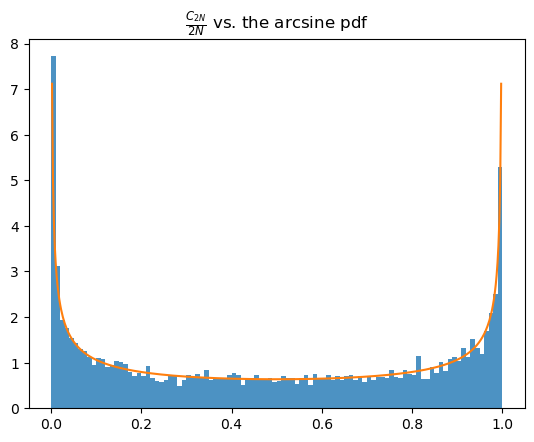

In [241]:
# Histogram of C_{2N}/2N
# Create the x and y values for the pdf of the arcsine distribution
x = np.linspace(0, 1, 500)
arcsine_pdf = arcsine.pdf(x)

# Plot the histogram of the Sample C_800 data, normalized by dividing sample_C_400 by 2N = 800
plt.hist(sample_C_400 / 800, bins = 100, density = True, alpha = 0.8)
plt.title(r'$\frac{C_{2N}}{2N}$ vs. the arcsine pdf')

# Plot the arcsine distribution
plt.plot(x, arcsine_pdf)

plt.show()

As mentioned the shapes of the histogram should look like the arcsine density above.

In [234]:
sample_M_400 = sampleMinTime(N = 400, M = 10000)

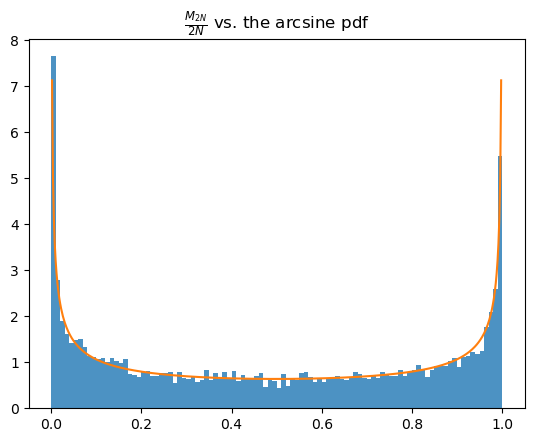

In [244]:
# Histogram of M_{2N}/2N

# Create the x and y values for the pdf of the arcsine distribution
x = np.linspace(0, 1, 500)
arcsine_pdf = arcsine.pdf(x)

# Plot the histogram of the Sample C_800 data, normalized by dividing sample_C_400 by 2N = 800
plt.hist(sample_M_400 / 800, bins = 100, density = True, alpha = 0.8)
plt.title(r'$\frac{M_{2N}}{2N}$ vs. the arcsine pdf')

# Plot the arcsine distribution
plt.plot(x, arcsine_pdf)

plt.show()

**3.** Use the arcsine approximation to evaluate the theoretical probabilities you were asked about in parts a and b and compare to what you got numerically by simulation.

In [207]:
## WRITE YOUR OWN CODE HERE
# Theoretical probability can be approximated by subtracting 1 - P(X <= x) of the arcsine approximation
approximation = 1 - ((2 / np.pi) * np.arcsin(np.sqrt(0.75)))

# Difference between approximation and simulation probabilities
difference = approximation - probability

print(f'The theoretical approximate probability is: {approximation}')
print(f'The difference between the theoretical approximation probability and the simulation probability is: {difference}')

The theoretical approximate probability is: 0.33333333333333337
The difference between the theoretical approximation probability and the simulation probability is: 0.03033333333333338


**4.** Next, let's look at the correlation between C_{2N} and M_{2N}. This means we want to use the *same path* to compute both its minimum up to time $2N$ and how much time it spends below zero. Intuitively, $C_{2N}$ and $M_{2N}$ are positively correlated: if the walk spends a lot of time above zero, it will have a larger minimum value. Using your above $M=10,000$ simulations, compute this correlation (a number between -1 and 1, see __numpy.corrcoef()__ function) empirically. Does it match the above intuition?

In [227]:
N = 40
M = 10000

# Want to use same random walk path on calculations for both, so can't use earlier functions

# Create new arrays to store new data
C_samples = np.empty(M)
M_samples = np.empty(M)

# Generate a random walk, then calculate that random walk's C_2N and M_2N for M times.
for m in range(M):
    path = randomWalk(2 * N)
    # Calculate the amount of steps where S_n is negative
    C_samples[m] = np.sum(path[1:] < 0) / (2 * N)
    # Calculate the step count where S_n reaches its minimum
    M_samples[m] = np.argmin(path) / (2 * N)

In [229]:
## WRITE YOUR OWN CODE HERE
np.corrcoef(C_samps, M_samps)[0, 1]

0.6171628792298823

The correlation seems to be pretty strongly positive, though not identically linear.

## Part e (4 points) 

Finally, let's explore the joint distribution of the final value of the random walk (i.e. at time $2N$) and the time it reaches the minimum. We expect that $S_{2N}$ would be larger when $M_{2N}$ is small. Use $M=10,000$ simulations and create a **scatter plot** with $S_{2N}$ on the x-axis and $M_{2N}$ on the y-axis. Discuss the shape of the point that you observe. 

In [232]:
## WRITE YOUR OWN CODE HERE
net_gain = np.empty(M)
min_times = np.empty(M)

# Generate M paths of size 2N. For each path, record its final value and the time it hit its minimum
for m in range (M):
    path = randomWalk(2 * N)
    net_gain[m] = path[-1]
    min_times[m] = np.argmin(path)

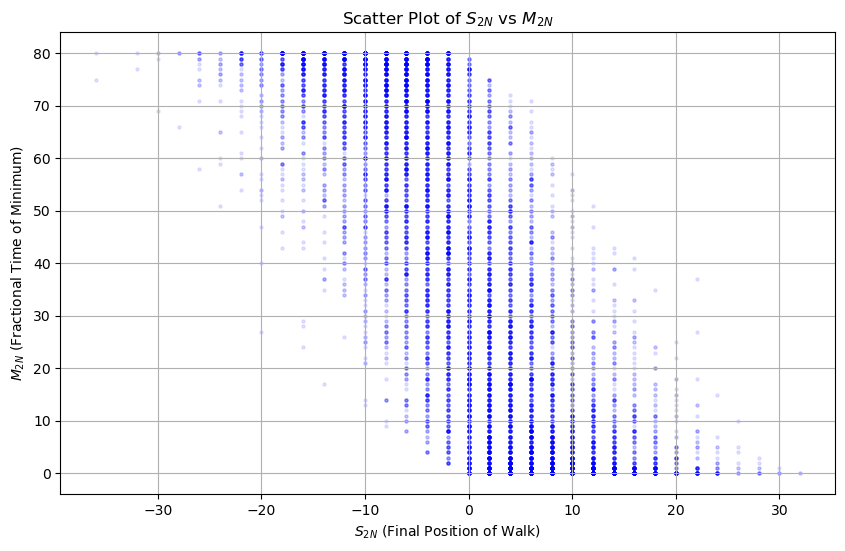

In [233]:
plt.figure(figsize=(10, 6))
plt.scatter(net_gain, min_times, alpha=0.1, s=5, color='blue')
plt.xlabel(r'$S_{2N}$ (Final Position of Walk)')
plt.ylabel(r'$M_{2N}$ (Time of Minimum)')
plt.title('Scatter Plot of $S_{2N}$ vs $M_{2N}$')
plt.grid(True)
plt.show()

The shape resembles a trapezoid shape, and like intuition, when the fractional position of the minimum hitting time is small, the value of the final position of the walk tends to be higher.